# Optimization using dlib

In this example we are going to explore optimization using OpenTURNS' [dlib](http://dlib.net/) interface.

In [2]:
from __future__ import print_function
import openturns as ot

In [3]:
# List available algorithms
for algo in ot.Dlib.GetAlgorithmNames():
    print(algo)

CG
BFGS
LBFGS
Newton
LSQ
LSQLM
TrustRegion


More details on dlib algorithms are available [here](http://dlib.net/optimization.html).

### Solving an unconstrained problem with conjugate gradient algorithm

The following example will demonstrate the use of dlib conjugate gradient algorithm to find the minimum of [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function). The optimal point can be computed analytically, and its value is [1.0, 1.0].

In [4]:
# Define the problem based on Rosebrock function
rosenbrock = ot.SymbolicFunction(['x1', 'x2'], ['(1-x1)^2+(x2-x1^2)^2'])
problem = ot.OptimizationProblem(rosenbrock)

In [5]:
# The optimization algorithm is instanciated from the problem to solve and the name of the algorithm
algo = ot.Dlib(problem,'CG')
print("Dlib algorithm, type ", algo.getAlgorithmName())
print("Maximum iteration number: ", algo.getMaximumIterationNumber())
print("Maximum evaluation number: ", algo.getMaximumEvaluationNumber())
print("Maximum absolute error: ", algo.getMaximumAbsoluteError())
print("Maximum relative error: ", algo.getMaximumRelativeError())
print("Maximum residual error: ", algo.getMaximumResidualError())
print("Maximum constraint error: ", algo.getMaximumConstraintError())

Dlib algorithm, type  CG
Maximum iteration number:  100
Maximum evaluation number:  100
Maximum absolute error:  1e-05
Maximum relative error:  1e-05
Maximum residual error:  1e-05
Maximum constraint error:  1e-05


When using conjugate gradient, BFGS/LBFGS, Newton, least squares or trust region methods, optimization proceeds until one of the following criteria is met:

- the errors (absolute, relative, residual, constraint) are all below the limits set by the user ;
- the process reaches the maximum number of iterations or function evaluations.

In [6]:
# Adjust number of iterations/evaluations
algo.setMaximumIterationNumber(1000)
algo.setMaximumEvaluationNumber(10000)
algo.setMaximumAbsoluteError(1e-3)
algo.setMaximumRelativeError(1e-3)
algo.setMaximumResidualError(1e-3)

In [7]:
# Solve the problem
startingPoint = [1.5, 0.5]
algo.setStartingPoint(startingPoint)

algo.run()

In [8]:
# Retrieve results
result = algo.getResult()
print('x^ = ', result.getOptimalPoint())
print("f(x^) = ", result.getOptimalValue())
print("Iteration number: ", result.getIterationNumber())
print("Evaluation number: ", result.getEvaluationNumber())
print("Absolute error: ", result.getAbsoluteError())
print("Relative error: ", result.getRelativeError())
print("Residual error: ", result.getResidualError())
print("Constraint error: ", result.getConstraintError())

x^ =  [0.995311,0.989195]
f(x^) =  [2.4084e-05]
Iteration number:  41
Evaluation number:  85
Absolute error:  0.0009776096028751445
Relative error:  0.0006966679389276845
Residual error:  4.302851151659242e-06
Constraint error:  0.0


### Solving problem with bounds, using LBFGS strategy

In the following example, the input variables will be bounded so the function global optimal point is not included in the search interval.

The problem will be solved using LBFGS strategy, which allows the user to limit the amount of memory used by the optimization process.

In [9]:
# Define the bounds and the problem
bounds = ot.Interval([0.0, 0.0], [0.8, 2.0])
boundedProblem = ot.OptimizationProblem(rosenbrock,ot.Function(),ot.Function(),bounds)

In [10]:
# Define the Dlib algorithm
boundedAlgo = ot.Dlib(boundedProblem,"LBFGS")
boundedAlgo.setMaxSize(15) # Default value for LBFGS' maxSize parameter is 10

startingPoint = [0.5, 1.5]
boundedAlgo.setStartingPoint(startingPoint)

boundedAlgo.run()

In [11]:
# Retrieve results
result = boundedAlgo.getResult()
print('x^ = ', result.getOptimalPoint())
print("f(x^) = ", result.getOptimalValue())
print("Iteration number: ", result.getIterationNumber())
print("Evaluation number: ", result.getEvaluationNumber())
print("Absolute error: ", result.getAbsoluteError())
print("Relative error: ", result.getRelativeError())
print("Residual error: ", result.getResidualError())
print("Constraint error: ", result.getConstraintError())

x^ =  [0.8,0.64]
f(x^) =  [0.04]
Iteration number:  6
Evaluation number:  10
Absolute error:  0.0
Relative error:  0.0
Residual error:  0.0
Constraint error:  0.0


**Remark:**
The bounds defined for input variables are always strictly respected when using dlib algorithms. Consequently, the constraint error is always 0.

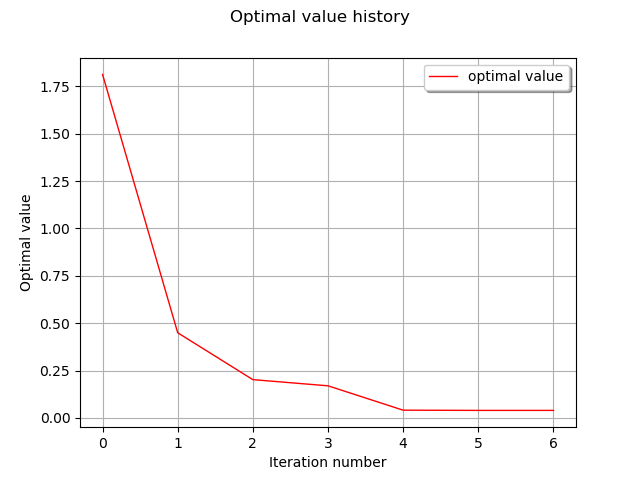

In [12]:
# Draw optimal value history
result.drawOptimalValueHistory()

### Solving least squares problem

In least squares problem, the user provides the residual function to minimize. Here the underlying OptimizationProblem is defined as a LeastSquaresProblem.

dlib least squares algorithms use the same stop criteria as CG, BFGS/LBFGS and Newton algorithms. However, optimization will stop earlier if no significant improvement can be achieved during the process.

In [13]:
# Define residual function
import numpy as np
n = 3
m = 20
x = [[0.5 + 0.1*i] for i in range(m)]

model = ot.SymbolicFunction(['a', 'b', 'c', 'x'], ['a + b * exp(-c *x^2)'])
p_ref = [2.8, 1.2, 0.5] # Reference a, b, c
modelx = ot.ParametricFunction(model, [0, 1, 2], p_ref)

# Generate reference sample (with normal noise)
y = np.multiply(modelx(x), np.random.normal(1.0,0.05,m))

def residualFunction(params):
    modelx = ot.ParametricFunction(model, [0, 1, 2], params)
    return [modelx(x[i])[0] - y[i, 0] for i in range(m)]

In [14]:
# Definition of residual as ot.PythonFunction and optimization problem
residual = ot.PythonFunction(n,m,residualFunction)
lsqProblem = ot.LeastSquaresProblem(residual)

In [15]:
# Definition of Dlib solver, setting starting point
lsqAlgo = ot.Dlib(lsqProblem, "LSQ")
lsqAlgo.setStartingPoint([0.0,0.0,0.0])

lsqAlgo.run()

In [16]:
# Retrieve results
result = lsqAlgo.getResult()
print('x^ = ', result.getOptimalPoint())
print("f(x^) = ", result.getOptimalValue())
print("Iteration number: ", result.getIterationNumber())
print("Evaluation number: ", result.getEvaluationNumber())
print("Absolute error: ", result.getAbsoluteError())
print("Relative error: ", result.getRelativeError())
print("Residual error: ", result.getResidualError())
print("Constraint error: ", result.getConstraintError())

x^ =  [2.80861,1.20369,0.5]
f(x^) =  [1.80332e-24]
Iteration number:  7
Evaluation number:  8
Absolute error:  9.004952683725238e-07
Relative error:  2.908277544011852e-07
Residual error:  4.3835538888355224e-13
Constraint error:  0.0


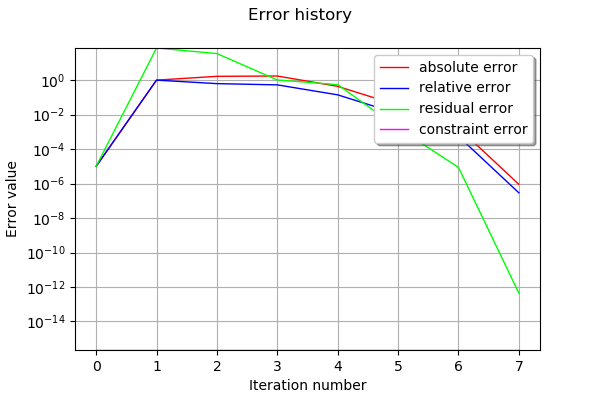

In [17]:
# Draw errors history
result.drawErrorHistory()

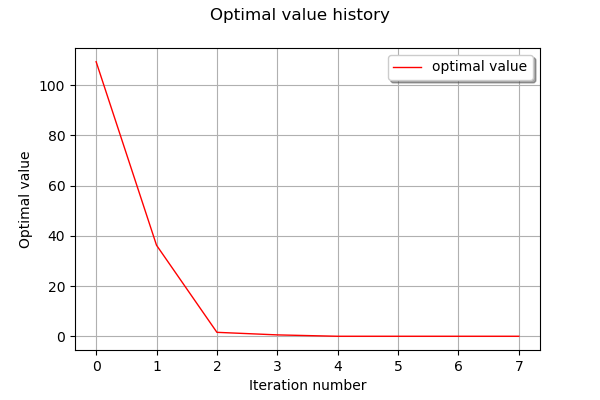

In [18]:
# Draw optimal value history
result.drawOptimalValueHistory()